In [ ]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#----------------------------------------------#Calcul des concentraion de diidoe--------------------------------
#           Initialisation des données
#------------------------------------------------------------------------------

reactif_titre=input("Entrer le nom du réactif titré :" ) 
Nb_stoech1 = int(input("Entrer le nombre stoechiométrique du réactif titré :"))   #  nombre stoechiométrique du réactif 1
reactif_titrant=input("Entrer le nom du réactif titrant :" ) 
Nb_stoech2 = int(input("Entrer le nombre stoechiométrique du réactif titrant :"))     #  nombre stoechimétrique du réactif 2
V1 = float(input("Entrer le volume V1 en mL de solution à titrer : ")) #  Volume initial de solution titrée en mL
C2= float(input("Entrer la concantration en mol/Lde réactif titrant :"))       #  concentration de la soltuion titrante en mol/L
V2_max=25       #  Volume maximal de solution titrante versé en mL
Vbe = float(input("Entrer le volume de solution titrante versé à l'équivalence :"))

Entrer le nom du réactif titré :i2
Entrer le nombre stoechiométrique du réactif titré :1
Entrer le nom du réactif titrant :thio
Entrer le nombre stoechiométrique du réactif titrant :1
Entrer le volume V1 en mL de solution à titrer : 5
Entrer la concantration en mol/Lde réactif titrant :0.001
Entrer le volume de solution titrante versé à l'équivalence :10


In [2]:
#------------------------------------------------------------------------------
#  Calcul de la concentration de réactif titré
#------------------------------------------------------------------------------

C1= Nb_stoech1*C2*Vbe/(Nb_stoech2*V1)

print("La concentration de réactif titré est : ", C1 ," mol/L.")
print()

La concentration de réactyif titré est :  0.002  mol/L.



Quantités de réactif titré au cours du titrage (en mol) : 
[1e-05, 9e-06, 8.000000000000001e-06, 7.000000000000001e-06, 6.000000000000001e-06, 5e-06, 4.000000000000001e-06, 3.000000000000001e-06, 2.000000000000001e-06, 1.0000000000000006e-06, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Quantités de réactif titrant au cours du titrage (en mol) : 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 9.99999999999999e-07, 1.9999999999999995e-06, 3e-06, 3.999999999999999e-06, 4.999999999999998e-06, 5.9999999999999985e-06, 6.999999999999999e-06, 8e-06, 9e-06, 1e-05, 1.1000000000000001e-05, 1.1999999999999999e-05, 1.3e-05, 1.4e-05, 1.5e-05]


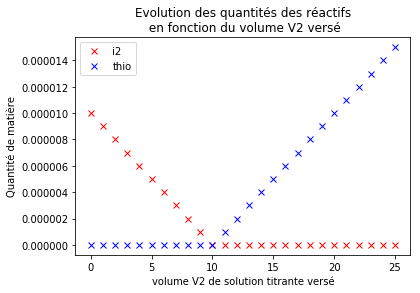

In [3]:

#------------------------------------------------------------------------------
#  Création de listes pour faciliter les tracés de courbes
#------------------------------------------------------------------------------


V2_verse=[] # liste contenant l'abscisse c'est-à-dire le volume de solution titrante
N1=[]   # liste contenant les quantités de matière de réactif titré
N2=[]   # liste contenant les quantités de matière de réactif titrant

#------------------------------------------------------------------------------
#   Boucle simulant l'ajout d'un volume V2 de solution titrante:
# Pour chaque ajout de solution titrante, le programme calcule les quantités 
#   de matière des réactifs titrant et titré.
#------------------------------------------------------------------------------

for V2 in range(V2_max+1):
    N1_init=C1*V1/1000   #Quantité de matière initiale de réactif titré
    N2_verse=C2*V2/1000   #Quantité de matière de réactif titrant versé
    V2_verse.append(V2)  # On ajoute V2 dans la liste
    
    if V2<Vbe:  # Avant l'équivalence
        N2.append(0)
        N1_restant=N1_init-Nb_stoech1*N2_verse/Nb_stoech2
        N1.append(N1_restant)
    else:  # après l'équivalence
        N1.append(0)
        N2_restant=C2*V2/1000-Nb_stoech2*N1_init/Nb_stoech1
        N2.append(N2_restant)

#--------------------------------------------------------------------------
#  Affichage des listes contenant les quantités de matière
#--------------------------------------------------------------------------
print("Quantités de réactif titré au cours du titrage (en mol) : ")
print(N1)
print()
print("Quantités de réactif titrant au cours du titrage (en mol) : ")
print(N2)


#------------------------------------------------------------------------------
#           Tracé du graphique
#------------------------------------------------------------------------------


#Tracé du nuage de points
plt.plot(V2_verse,N1,"rx",label=reactif_titre) 
plt.plot(V2_verse,N2,"bx",label=reactif_titrant) 


#Titres des axes et du graphique
plt.title("Evolution des quantités des réactifs\n en fonction du volume V2 versé",color='black')
plt.ylabel('Quantité de matière')#nom de l'axe des ordonnées
plt.xlabel("volume V2 de solution titrante versé")#nom des axes des abscisses

#affichage de la légende
plt.legend()
plt.show() 